# ASSOCIATIONS: TWO QUANTITATIVE VARIABLES


## Introduction

When associations exist between variables, it means that information about the value of one variable gives us information about the value of the other variable. In this lesson, we will cover ways of examining an association between two quantitative variables.

Throughout the next few exercises, we’ll examine some data about Texas housing rentals on Craigslist — an online classifieds site. The data dictionary is as follows:

- price: monthly rental price in U.S.D.
- type: type of housing (eg., 'apartment', 'house', 'condo', etc.)
- sqfeet: housing area, in square feet
- beds: number of beds
- baths: number of baths
- lat: latitude
- long: longitude

Except for type, all of these variables are quantitative. Which pairs of variables do you think might be associated? For example, does knowing something about price give you any information about square footage?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

np.set_printoptions(suppress=True, precision=1)


In [2]:
housing = pd.read_csv("../data/housing_sample.csv")

# print the first 10 rows of data:
print(housing.head(10))


   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940
5    915  apartment     620     1    1.0  29.8754  -97.9404
6   1600      house    1578     3    2.0  32.6412  -97.1058
7    349  apartment     275     0    1.0  33.5865 -101.8610
8    695      house     650     1    1.0  31.5525  -97.1604
9    889  apartment     650     1    1.5  29.8754  -97.9404


## Scatter Plots

One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot. This makes it easy to look for patterns or trends in the data. Let’s start by plotting the area of a rental against its monthly price to see if we can spot any patterns.

```python
plt.scatter(x = housing.price, y = housing.sqfeet)
plt.xlabel('Rental Price (USD)')
plt.ylabel('Area (Square Feet)')
plt.show()
```

![This image shows a scatter plot with price on the x-axis and area on the y-axis. There is a clear linear relationship; rentals that cost more tend to have larger area.](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/price_v_area.svg)

While there’s a lot of variation in the data, it seems like more expensive housing tends to come with slightly more space. This suggests an association between these two variables.

It’s important to note that different kinds of associations can lead to different patterns in a scatter plot. For example, the following plot shows the relationship between the age of a child in months and their weight in pounds. We can see that older children tend to weigh more but that the growth rate starts leveling off after 36 months:

![Plot showing the relationship between the age of a child in months and their weight in pounds. We can see that older children tend to weigh more but that the growth rate starts leveling off after 36 months](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/weightvage.svg)

If we don’t see any patterns in a scatter plot, we can probably guess that the variables are not associated. For example, a scatter plot like this would suggest no association:

![Scatter plot with no apparent pattern; the points appear randomly distributed.](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/no_association.svg)


   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940


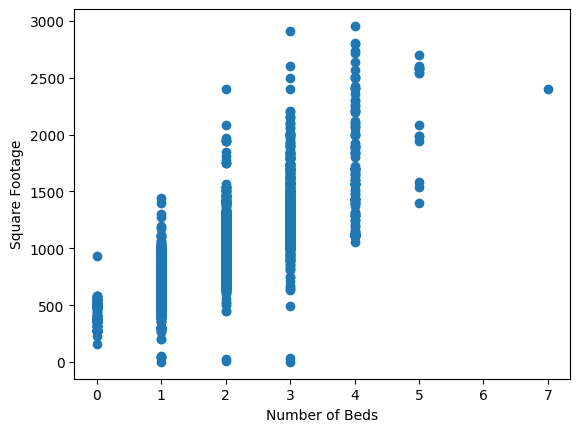

In [3]:
print(housing.head())

# create your scatter plot here:
plt.scatter(x=housing.beds, y=housing.sqfeet)
plt.xlabel("Number of Beds")
plt.ylabel("Square Footage")
plt.show()


## Exploring Covariance

Beyond visualizing relationships, we can also use summary statistics to quantify the strength of certain associations. Covariance is a summary statistic that describes the strength of a linear relationship. A linear relationship is one where a straight line would best describe the pattern of points in a scatter plot.

Covariance can range from negative infinity to positive infinity. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other. A negative covariance indicates a larger value of one variable is associated with a smaller value of the other. A covariance of 0 indicates no linear relationship. Here are some examples:

This figure shows three different plots. In the first, the points are almost exactly along a line with a positive slope and the label is "large positive covariance". In the middle plot, the points are randomly scattered and the label is "covariance of zero". In the last plot, the points are almost exactly on a negatively sloping line and the label is "large negative covariance"

To calculate covariance, we can use the `cov()` function from NumPy, which produces a covariance matrix for two or more variables. A covariance matrix for two variables looks something like this:

| matrix     | variable 1           | variable 2           |
|------------|----------------------|----------------------|
| variable 1 | variance(variable 1) | covariance           |
| variable 2 | covariance           | variance(variable 2) |

In python, we can calculate this matrix as follows:

```python
cov_mat_price_sqfeet = np.cov(housing.price, housing.sqfeet)
print(cov_mat_price_sqfeet)
#output: 
[[184332.9  57336.2]
 [ 57336.2 122045.2]]
```

Notice that the covariance appears twice in this matrix and is equal to 57336.2.

In [4]:
# calculate and print covariance matrix:
cov_mat_sqfeet_beds = np.cov(housing.sqfeet, housing.beds)
print(cov_mat_sqfeet_beds)

# store the covariance as cov_sqfeet_beds
cov_sqfeet_beds = 228.2


[[110669.     228.2]
 [   228.2      0.7]]


## Correlation- Part 1

Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

![This figure shows 5 different plots. From left to right, the plots show a correlation of 1, a large positive correlation, no correlation, a large negative correlation, and a correlation of -1.](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/correlation_fig_1-3.svg)

The pearsonr() function from scipy.stats can be used to calculate correlation as follows:

from scipy.stats import pearsonr
corr_price_sqfeet, p = pearsonr(housing.price, housing.sqfeet)
print(corr_price_sqfeet) #output: 0.507
Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.


0.8060022524416163


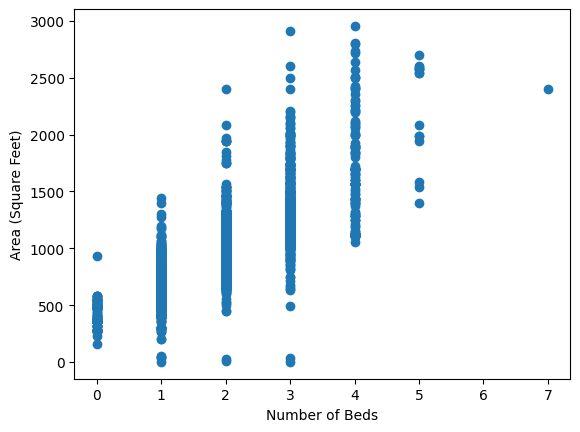

In [5]:
# calculate corr_sqfeet_beds and print it out:
corr_sqfeet_beds, p = pearsonr(housing.beds, housing.sqfeet)
print(corr_sqfeet_beds)

# create the scatter plot here:
plt.scatter(x=housing.beds, y=housing.sqfeet)
plt.xlabel("Number of Beds")
plt.ylabel("Area (Square Feet)")
plt.show()


## Correlation Part 2

It’s important to note that there are some limitations to using correlation or covariance as a way of assessing whether there is an association between two variables. Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

For example, the four scatter plots below all show pairs of variables with near-zero correlations. The bottom left image shows an example of a perfect linear association where the slope is zero (the line is horizontal). Meanwhile, the other three plots show non-linear relationships — if we drew a line through any of these sets of points, that line would need to be curved, not straight!

![This figure shows four different scatter plots where the correlation is equal to zero in every case. The bottom left image shows an example of a perfect linear association where the slope is zero (the line is horizontal). Meanwhile, the other three plots show non-linear relationships, where the points follow a curved pattern.](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/correlation_fig_2.svg)


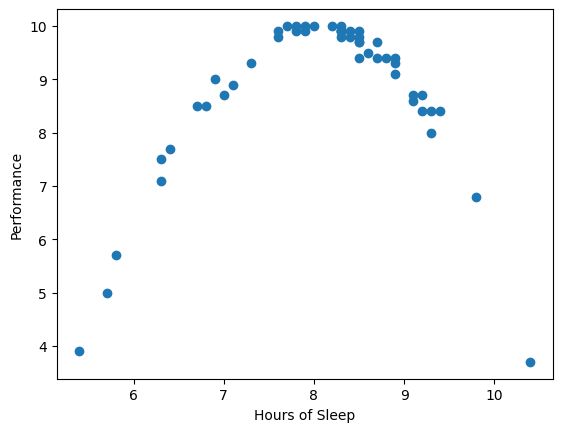

0.28149781890494135


In [6]:
sleep = pd.read_csv("sleep_performance.csv")

# create your scatter plot here:
plt.scatter(sleep.hours_sleep, sleep.performance)
plt.xlabel("Hours of Sleep")
plt.ylabel("Performance")
plt.show()

# calculate the correlation for `hours_sleep` and `performance`:
corr_sleep_performance, p = pearsonr(sleep.hours_sleep, sleep.performance)
print(corr_sleep_performance)


## Review

In this lesson we discussed several ways of examining an association between two quantitative variables. More specifically, we:

Used scatter plots to examine relationships between quantitative variables
Used covariance and correlation to quantify the strength of a linear relationship between two quantitative variables
Note that the dataset used in this lesson was downloaded from [kaggle](https://www.kaggle.com/austinreese/usa-housing-listings).

Instructions
As a final exercise, a new dataset named penguins has been uploaded for you in script.py. This dataset contains various measurements for a sample of penguins. To practice the skills learned in this lesson, here are some things to try:

Inspect the first few rows of data.
Create a scatter plot of flipper length (flipper_length_mm) and body mass (body_mass_g).
Inspect your plot. What is the relationship between these variables?
Calculate the covariance for these two variables.
Calculate the correlation for these two variables. Does this number make sense given the plot you created?
Solution code is available to you in solution.py if you want to compare your work.


In [8]:
penguins = pd.read_csv("penguins.csv")

# print the first few rows
print(penguins.head())


  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
3  Adelie            36.7           19.3              193.0       3450.0   
4  Adelie            39.3           20.6              190.0       3650.0   

      sex  
0    male  
1  female  
2  female  
3  female  
4    male  


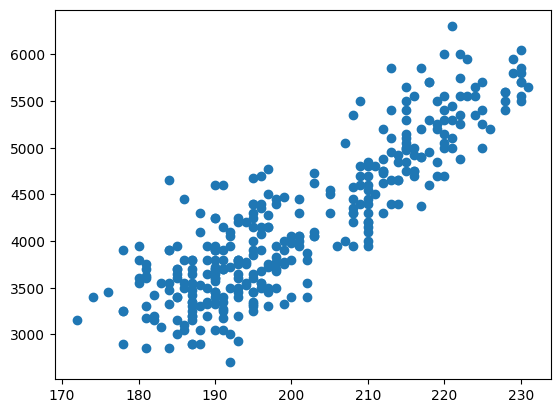

In [9]:
# create a scatter plot
plt.scatter(penguins.flipper_length_mm, penguins.body_mass_g)
plt.show()


In [14]:
# calculate covariance:
covariance_mat = np.cov(penguins.flipper_length_mm, penguins.body_mass_g)
# calculate correlation:
correlation, p = pearsonr(penguins.flipper_length_mm, penguins.body_mass_g)

print(
    f"covariance matrix:\n{covariance_mat}\n"
    f"\ncovariance:        {covariance_mat[1][0]}\n"
    f"\ncorrelation:       {correlation}"
)


covariance matrix:
[[   196.4   9852.2]
 [  9852.2 648372.5]]

covariance:        9852.191649480807

correlation:       0.8729788985653616
